In [6]:
import pandas as pd
import numpy as np

Importing Data set

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
df.head

<bound method NDFrame.head of          rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]>

Checking Null values in DataFrame

In [10]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Checking Data Types of columns

In [11]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Making DataFrame for nominal data

In [12]:
df_visualization_nominal = df[["rank","discipline","sex"]].copy()

In [13]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

Visualization of Data

In [14]:
import seaborn as sns

B    216
A    181
Name: discipline, dtype: int64


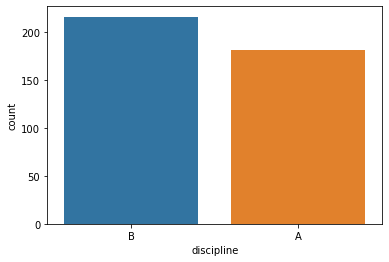

In [15]:
ax = sns.countplot(x="discipline", data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


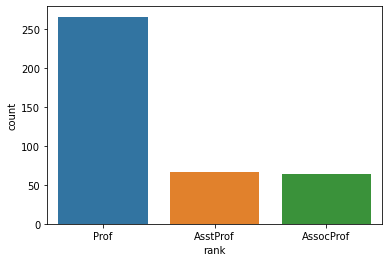

In [16]:
ax = sns.countplot(x="rank", data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


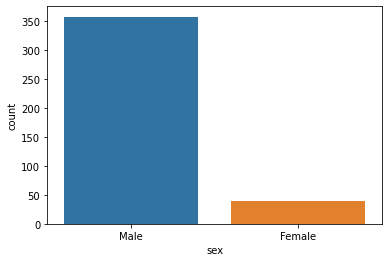

In [17]:
ax = sns.countplot(x="sex", data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

Making DataFrame for ordinal data

In [18]:
df_visualization_ordinal = df[["yrs.since.phd","yrs.service","salary"]].copy()

In [19]:
df_visualization_ordinal.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

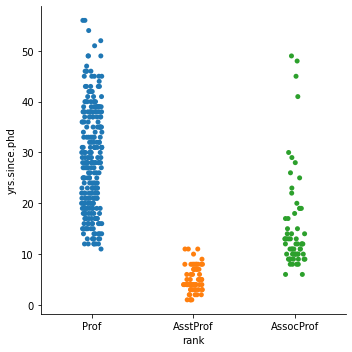

In [20]:
sns.catplot(x="rank",y="yrs.since.phd",data=df)

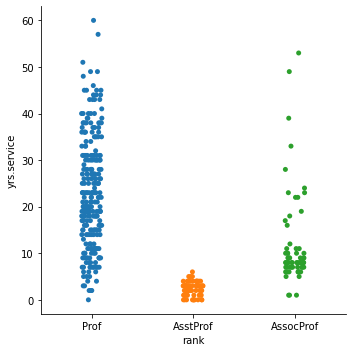

In [21]:
sns.catplot(x="rank",y="yrs.service",data=df)

Checking distribution of continuouse data

In [22]:
df_visualization_continuous=df[["yrs.since.phd","yrs.service","salary"]].copy()

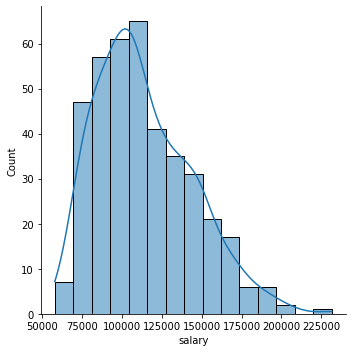

In [23]:
sns.displot(df_visualization_continuous["salary"],kde=True)

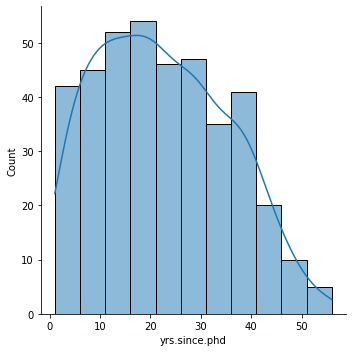

In [24]:
sns.displot(df_visualization_continuous["yrs.since.phd"],kde=True)

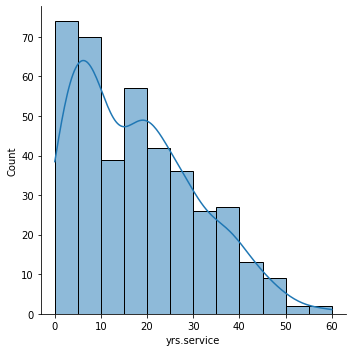

In [25]:
sns.displot(df_visualization_continuous["yrs.service"],kde=True)

Encoding Srting data

In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [27]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


Describe Data sheet

In [29]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

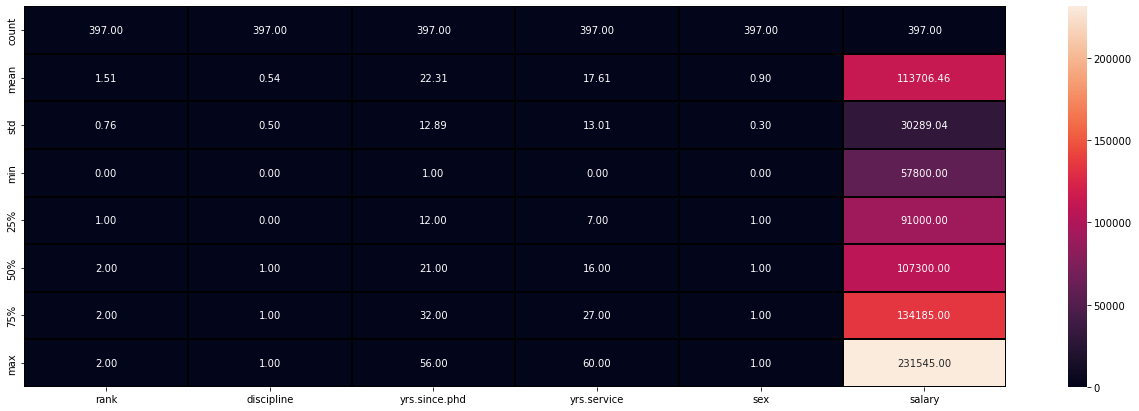

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Correlation of columns with Target column

In [31]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

Keeping +/-0.5 as the range of the skewness ony rank column does not lie within this range.
Range is catogorical column
Hence no column has skewness and we will not treat them.

Outliers check

In [32]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

Checking outliers on int and float data

<AxesSubplot:>

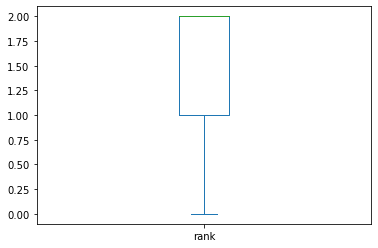

In [33]:
df['rank'].plot.box()

<AxesSubplot:>

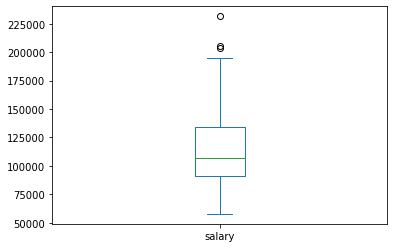

In [34]:
df['salary'].plot.box()

<AxesSubplot:>

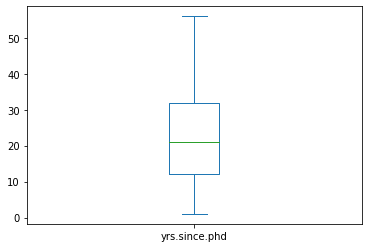

In [35]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

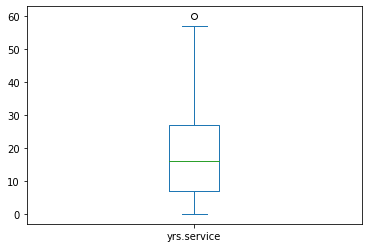

In [36]:
df['yrs.service'].plot.box()

Outlier Removal

In [37]:
df.shape

(397, 6)

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [39]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [40]:
df_new_z.shape

(354, 6)

Percentage loss of data

In [41]:
Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

Separating columns into features and target

In [42]:
features = df.drop("salary",axis=1)
target=df['salary']

Scaling data using MInMax scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
for i in range(0,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.3,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f"At randon state{i}, the training accuracy is: {r2_score(target_train,pred_train)}")
    print(f"At randon state{i}, the testing accuracy is: {r2_score(target_test,pred_test)}")
    print("\n")

At randon state0, the training accuracy is: 0.35238978918304
At randon state0, the testing accuracy is: 0.39447050069954415


At randon state1, the training accuracy is: 0.37981683378332454
At randon state1, the testing accuracy is: 0.3175095677056927


At randon state2, the training accuracy is: 0.41023070933432815
At randon state2, the testing accuracy is: 0.23211121140557933


At randon state3, the training accuracy is: 0.3849700365272738
At randon state3, the testing accuracy is: 0.337852991940501


At randon state4, the training accuracy is: 0.38484712069927296
At randon state4, the testing accuracy is: 0.3074550051668904


At randon state5, the training accuracy is: 0.4197135328568442
At randon state5, the testing accuracy is: 0.2189167456223685


At randon state6, the training accuracy is: 0.3770581841035514
At randon state6, the testing accuracy is: 0.3513506580306238


At randon state7, the training accuracy is: 0.3526070609258284
At randon state7, the testing accuracy is: 0.4

Train model

In [46]:
lr.fit(features_train,target_train)

LinearRegression()

In [47]:
pred_test=lr.predict(features_test)

In [48]:
print(r2_score(target_test,pred_test))

0.3537511005851165


Cross validation of model

In [50]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.32708011674065085 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 3 the cv score is 0.32033286730598814 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 4 the cv score is 0.32181966937683604 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 5 the cv score is 0.29569928663871764 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 6 the cv score is 0.33096341839295573 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is 0.3767393671050667 and accuracy for the testing is 0.3537511005851165


At cross fold 8 the cv score is 0.3310060584513

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [53]:
#final model training
ls = Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

37.673762094262464

In [54]:
pred_ls = ls.predict(features_test)

In [55]:
lss = r2_score(target_test,pred_ls)
lss*100

35.385022222648246

In [56]:
cv_score = cross_val_score(ls,features,target,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

29.575407060855923